In [1]:
import geopandas as gpd
import cartopy
import matplotlib.pyplot as plt



In [2]:


#Read in a file, to show kind of output
shapefile = gpd.read_file("../parm/FEMA_Regions.shp")

#Print out the names of the variables within the shapefile
for header in (shapefile):
    print(header)


OBJECTID
REGION
CNT_REGION
RuleID
Shape_Leng
Shape_Area
geometry


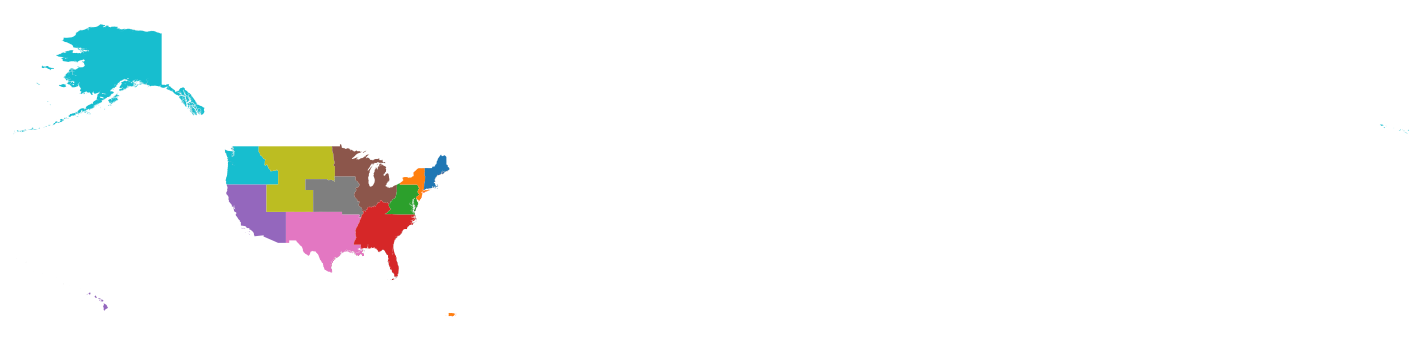

In [3]:
# You can simply plot the data with filename.plot()
# but I find this hard to customize and get exactly right
# 
# You are welcome to use this approach

PROJ = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(14,10))

ax = fig.add_axes([0, 0, 1, 1], projection=PROJ,frameon=False)

shapefile.plot(column="REGION",ax=ax)

plt.show()

Region None has no shape, skipping


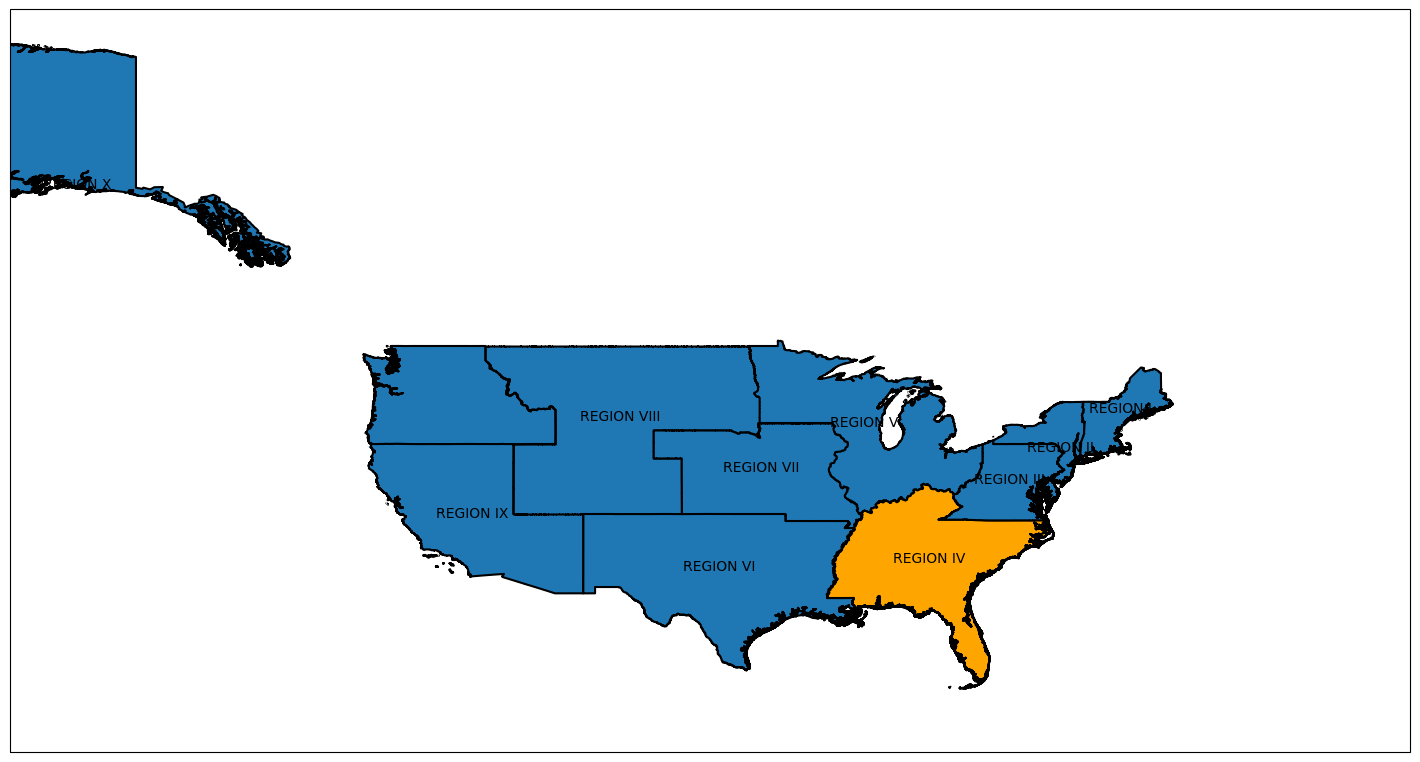

In [4]:

def plot_fema_regions(filename,print_header=False,SAVEPATH='../figs'): 
    
    # Read in the file
    shapefile = gpd.read_file(filename)

    if print_header==True:
        #Print out the names of the variables within the shapefile
        for header in (shapefile):
            print(header)

    # Rename some information from the shapefile
    GEOMETRIES = shapefile['geometry']
    NAMES      = shapefile['REGION']
    AREAS      = shapefile['Shape_Area']

    
    #Create figure
    PROJ = cartopy.crs.PlateCarree()
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_axes([0, 0, 1, 1], projection=PROJ,frameon=True)
        
    # Loop through the shapes and plot them
    for i,GEOMETRY in enumerate(GEOMETRIES):
        NAME = NAMES[i]
        AREA = AREAS[i]
        
        # There is a missing region in the file, lets skip it
        if AREA<=0.:
            print('Region %s has no shape, skipping'%NAME)
            continue
        
        # Plot the shape for the region
        ax.add_geometries(GEOMETRY,crs=PROJ,ec='k',lw=1.5)
        
        # Shade a region a different color
        # overwrites the above plot for the shape
        if NAME=='REGION IV':
            ax.add_geometries(GEOMETRY,crs=PROJ,fc='orange',ec='k',lw=1.5)

        # Get the center of region    
        point_coords = GEOMETRY.centroid.coords[0]

        # Add in the name (may not work for large areas that are discontinuous)
        ax.text(point_coords[0],point_coords[1],NAME,transform=PROJ,horizontalalignment='center',zorder=3)
          

    # Bound the plot
    ax.set_extent([-150,-50,20,65])
    plt.savefig(SAVEPATH+'/FEMA_Regions_test.png',bbox_inches='tight')
    plt.show()
    

plot_fema_regions("../parm/FEMA_Regions.shp")